In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from pywaffle import Waffle
plt.style.use('ggplot')

%matplotlib inline

In [2]:
## Read in data
df = pd.read_csv('911.csv')

In [3]:
## Check info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
df.head(5)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [5]:
## Check missing values
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing*100))

lat - 0.0%
lng - 0.0%
desc - 0.0%
zip - 12.086863736243862%
title - 0.0%
timeStamp - 0.0%
twp - 0.04415829467598663%
addr - 0.0%
e - 0.0%


In [6]:
# Drop missing values
df = df.dropna()

## EDA

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LOWER MERION'),
  Text(1, 0, 'ABINGTON'),
  Text(2, 0, 'NORRISTOWN'),
  Text(3, 0, 'POTTSTOWN'),
  Text(4, 0, 'CHELTENHAM')])

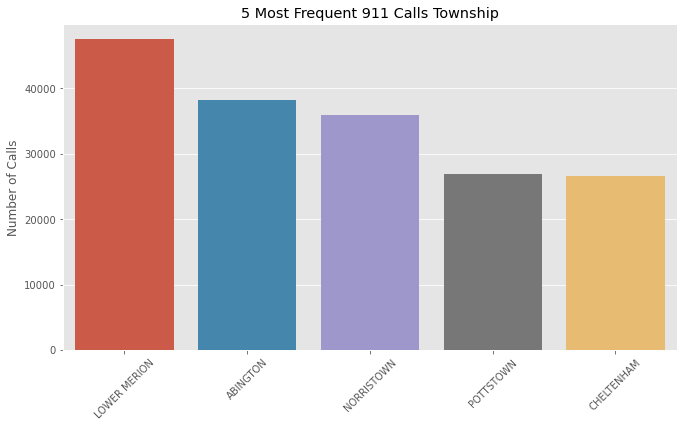

In [7]:
## Top 5 township for 911 calls
plt.figure(figsize = (11,6))
sns.countplot(x='twp',data=df, order=df.twp.value_counts().iloc[:5].index)
plt.title('5 Most Frequent 911 Calls Township')
plt.ylabel('Number of Calls')
plt.xlabel('')
plt.xticks(rotation=45)

# Creating new features

**Merge title together**

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [9]:
df['Reason'].value_counts()

EMS        304785
Traffic    189597
Fire        88817
Name: Reason, dtype: int64

Text(0, 0.5, 'Number of Calls')

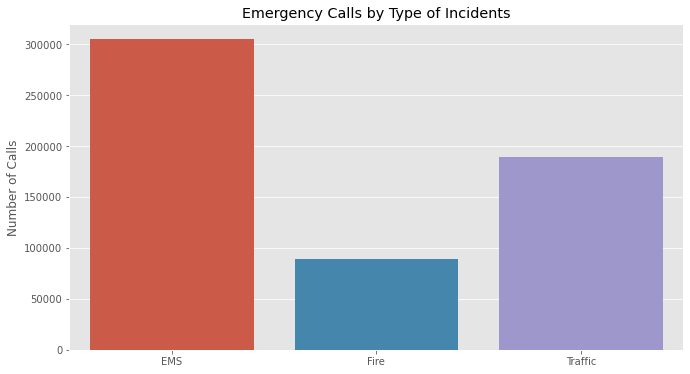

In [10]:
## Emergency Calls by Type of Incidents
plt.figure(figsize = (11,6))
sns.countplot(x = 'Reason', data = df)
plt.title('Emergency Calls by Type of Incidents')
plt.xlabel('')
plt.ylabel('Number of Calls')

In [12]:
## Convert timeStamp to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

## Divide timeStamp to hour, month, and day of week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['DayofWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [13]:
## Change index of dayofweek from number to name of the day
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayofWeek'] = df['DayofWeek'].map(dmap)


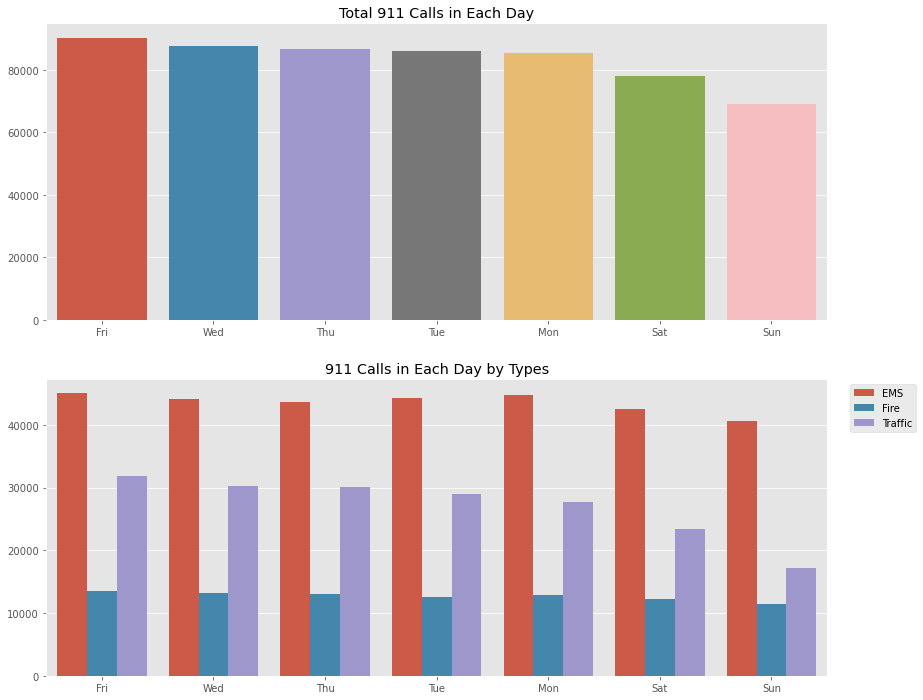

In [14]:
## 911 Calls in Each Day
plt.figure(figsize = (14,12))
plt.subplot(2,1,1)
sns.countplot(x  = 'DayofWeek', data = df, order = df['DayofWeek'].value_counts().index)
plt.title('Total 911 Calls in Each Day')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,1,2)
#plt.figure(figsize = (11,6))
sns.countplot(x = 'DayofWeek', data = df, hue = 'Reason', order = df['DayofWeek'].value_counts().index)
plt.title('911 Calls in Each Day by Types')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.12, 1))

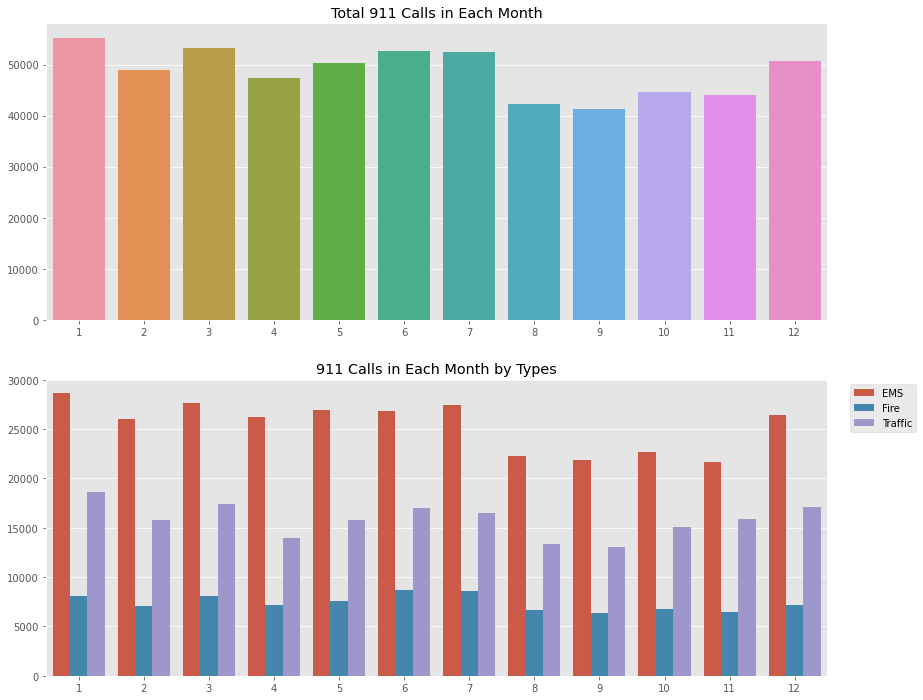

In [15]:
## 911 Calls in Each Month

plt.figure(figsize = (14,12))
plt.subplot(2,1,1)
sns.countplot(x  = 'Month', data = df)
plt.title('Total 911 Calls in Each Month')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,1,2)
sns.countplot(x = 'Month', data = df, hue = 'Reason')
plt.title('911 Calls in Each Month by Types')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.12, 1))

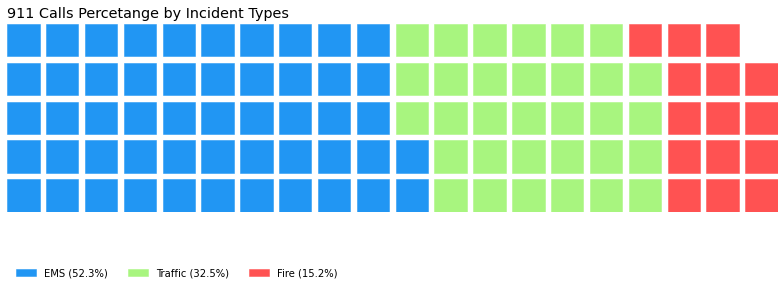

In [16]:
## Waffle Plot of Reason
EMS_percentage = round(df[df['Reason'] == 'EMS']['Reason'].count()/df['Reason'].count()*100, 1)
Traffic_percentage = round(df[df['Reason'] == 'Traffic']['Reason'].count()/df['Reason'].count()*100,1)
Fire_percentage = round(df[df['Reason'] == 'Fire']['Reason'].count()/df['Reason'].count()*100,1)

data  = {'EMS': EMS_percentage, 'Traffic': Traffic_percentage, 'Fire': Fire_percentage}

fig = plt.figure(FigureClass=Waffle,
                figsize = (11,6),
                rows = 5,
                values = data,
                colors=("#2196f3", "#A8F57F", "#ff5252"),
                title={'label': '911 Calls Percetange by Incident Types', 'loc': 'left'},
                labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
                legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0})

plt.show()

Text(78.0, 0.5, '')

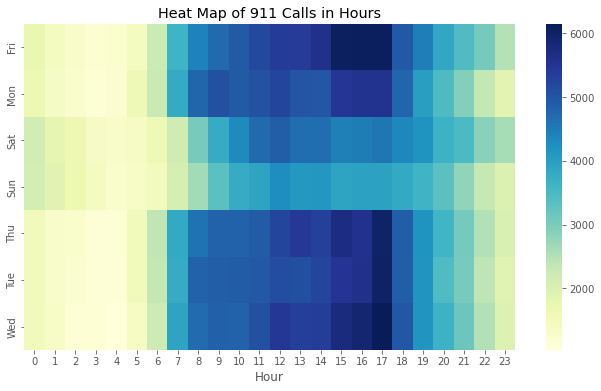

In [17]:
## Heatmap Hour
dayHour = df.groupby(by = ['DayofWeek','Hour'])['Reason'].count().unstack()

plt.figure(figsize = (11,6))
sns.heatmap(dayHour, cmap = 'YlGnBu')
plt.title('Heat Map of 911 Calls in Hours')
plt.ylabel('')

In [18]:
## Map 5000 Randomly calls
montgomery_map =folium.Map([40.121354,-75.363829],zoom_start=11)

random_index=np.random.choice(df.index,5000)
for ind in random_index:
    lat=df.loc[ind,'lat']
    long=df.loc[ind,'lng']
    folium.CircleMarker([lat,long],radius=1).add_to(montgomery_map)
montgomery_map